# Algerian forest fire Logiscic regression for forest fire prediction

![image info](https://wallpaperset.com/w/full/8/a/8/156439.jpg)

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

# 1) Problem statement.

### Check for Data Balance
1. If data set is not imbalanced create a model with accuracy greater than 90% and observe Precission, or recall or f1 score.

### If data is imbalanced 
1. If data is imbalanced then,handel imbalanced data and create a model with accuracy greater than 90% and observe Precission, or recall or f1 score.

# Reading the data

In [1]:
### 2.1 Import Data and Required Packages

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [182]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1,skiprows=[124,125,126])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [277]:
#Out of topic experiment (Just for fun)
#!pip install colorama
from colorama import Fore
print(Fore.RED +"Fire! Fire! Fire!")
print(Fore.CYAN +"Fire! Fire! Fire!")
print(Fore.GREEN +"Fire! Fire! Fire!")
print(Fore.MAGENTA +"Fire! Fire! Fire!")
print(Fore.YELLOW +"Fire! Fire! Fire!")
print(Fore.BLUE +"Fire! Fire! Fire!")
print(Fore.RED +"Fire! Fire! Fire!")
print(Fore.GREEN +"Fire! Fire! Fire!")

Fire! Fire! Fire!
Fire! Fire! Fire!
Fire! Fire! Fire!
Fire! Fire! Fire!
Fire! Fire! Fire!
Fire! Fire! Fire!
Fire! Fire! Fire!
Fire! Fire! Fire!


In [183]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [184]:
df.iloc[:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire


# Remove extra Rows and Add a new column for region

In [165]:
#df.drop(df.index[[122,123,124]], inplace=True)

In [185]:
for index in range(df.shape[0]):
    if index < 122:
        df.loc[index,'region'] = 0
    else:
        df.loc[index,'region'] = 1

In [186]:
df.iloc[:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0


In [187]:
df.drop(['year'], axis=1, inplace=True)

In [188]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [189]:
col = [x.strip() for x in df.columns]
print(col)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region']


In [190]:
df.columns = col

In [191]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [192]:
df.shape

(244, 14)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 124
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    object 
 1   month        241 non-null    object 
 2   Temperature  241 non-null    object 
 3   RH           241 non-null    object 
 4   Ws           241 non-null    object 
 5   Rain         241 non-null    object 
 6   FFMC         241 non-null    object 
 7   DMC          241 non-null    object 
 8   DC           241 non-null    object 
 9   ISI          241 non-null    object 
 10  BUI          241 non-null    object 
 11  FWI          241 non-null    object 
 12  Classes      241 non-null    object 
 13  region       241 non-null    float64
dtypes: float64(1), object(13)
memory usage: 28.6+ KB


In [193]:
#Checking for Unique data in Classes
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [194]:
df['Classes'] = df['Classes'].map(lambda x: x.strip())

In [196]:
#Checking for Unique data in Classes
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [197]:
#Adding a column fire to indicate 0 for no fire and 1 for fire
df['fire'] = pd.factorize(df.Classes)[0]

In [198]:
#Cleaned Data Frame
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0,0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,0


# Basic Details About Data Set

Show top 5 records

In [199]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0,0


Shape of the dataset

In [200]:
df.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0,0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,0
243,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0,0


In [15]:
df.shape

(244, 16)

Summery of the dataset

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    object 
 13  region       244 non-null    float64
 14  fire         244 non-null    int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 28.7+ KB


Observation:
    As a lot of relevant columns are in Object type, we need to convert the type to do basic opearation.

Action:Converting desired columns into float

In [204]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region', 'fire'],
      dtype='object')

In [206]:
df = df.astype({'day':'int','month':'int','Temperature':'int','RH':'int','Ws':'int','Rain':'float','FFMC':'float','DMC':'float','ISI':'float','BUI':'float','FWI':'float'})

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   Temperature  244 non-null    int32  
 3   RH           244 non-null    int32  
 4   Ws           244 non-null    int32  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    object 
 13  region       244 non-null    float64
 14  fire         244 non-null    int64  
dtypes: float64(8), int32(5), int64(1), object(1)
memory usage: 24.0+ KB


In [208]:
# Dropping Classes as it is a Object type variable
df.drop(['Classes'], axis=1, inplace=True)

In [209]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000,0.565574
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028,0.496700
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000,1.000000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [210]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0


# Exploring Data

In [211]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region', 'fire']

We have 0 categorical features : []


# Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire
13. Region: 0 Signifies Bejaia region and 1 signifies Sidi Bel-abbes region
14. Fire: 0 indicstes fire and 1 indicates no fire

# Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

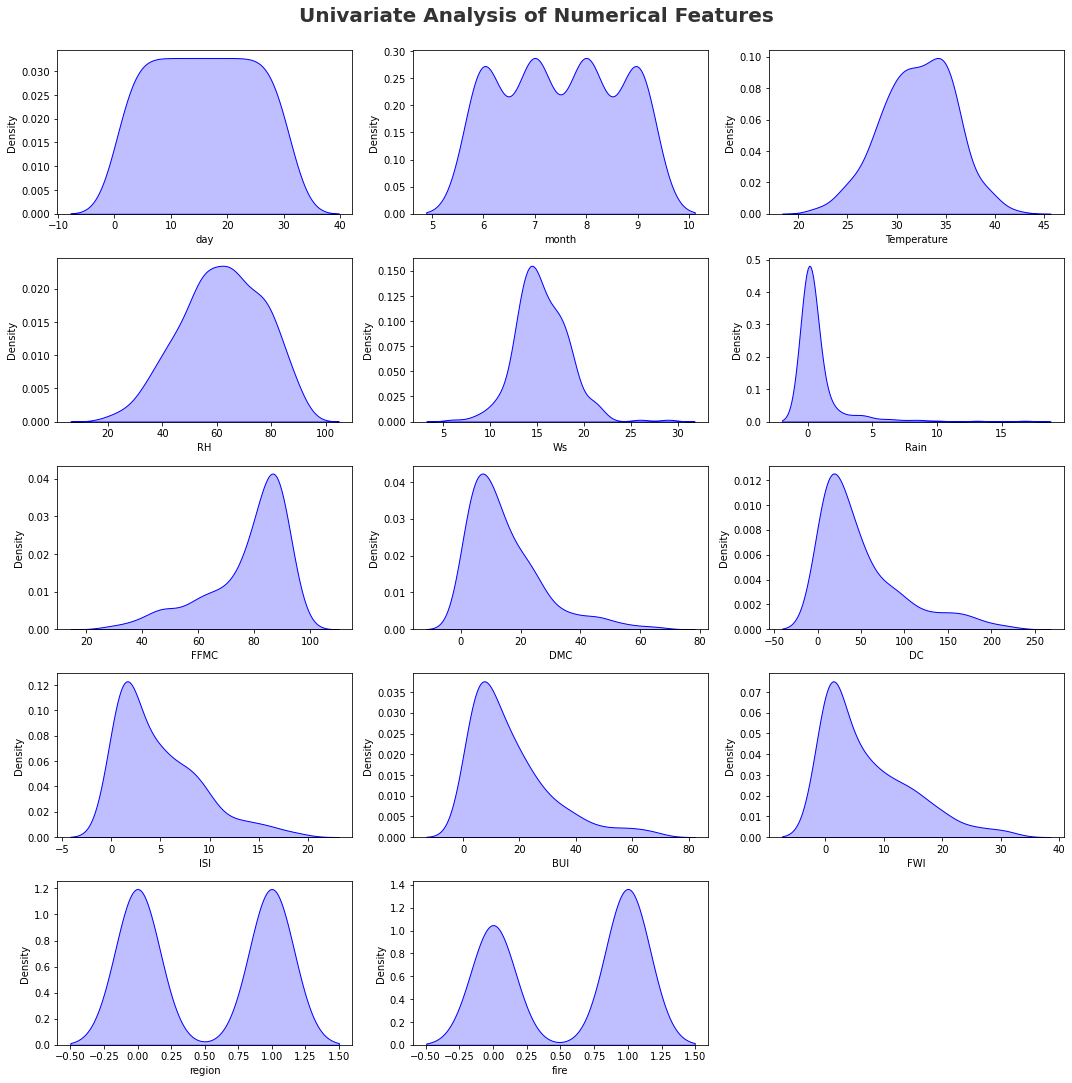

In [212]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**
* Rain, DMC, BUI, ISI are right skewed and postively skewed.
* FFMC is left skewed
* Outliers in BUI and DMC power.

# Multivariate Analysis

### Check Multicollinearity in Numerical features

In [213]:
df[(list(df.columns)[1:])].corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire
month,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-9.586232e-17,0.022333
Temperature,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01,0.518119
RH,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01,-0.435023
Ws,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01,-0.066529
Rain,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02,-0.379449
FFMC,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01,0.770114
DMC,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01,0.584188
DC,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-8.148947e-02,0.507122
ISI,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,2.662977e-01,0.736142
BUI,8.556743e-02,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,8.799645e-02,0.584545


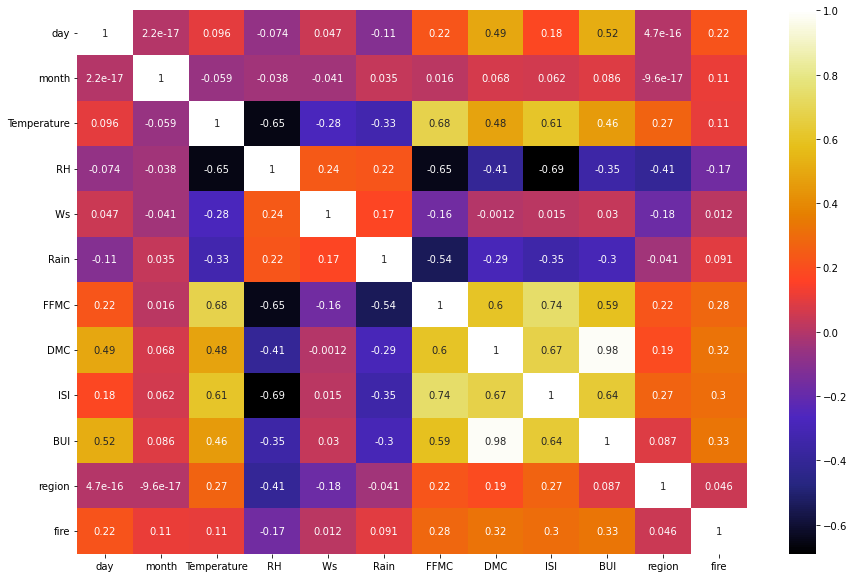

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
* RH is negatively corelated with Temperature, FFMC and ISI
* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

# Checking Null Values

In [214]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
fire           0
dtype: int64

Report: There are no null values

In [215]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [216]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())<=2]
print('Num of catagorical features :',continues_features)

Num of catagorical features : ['region', 'fire']


array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'fire'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

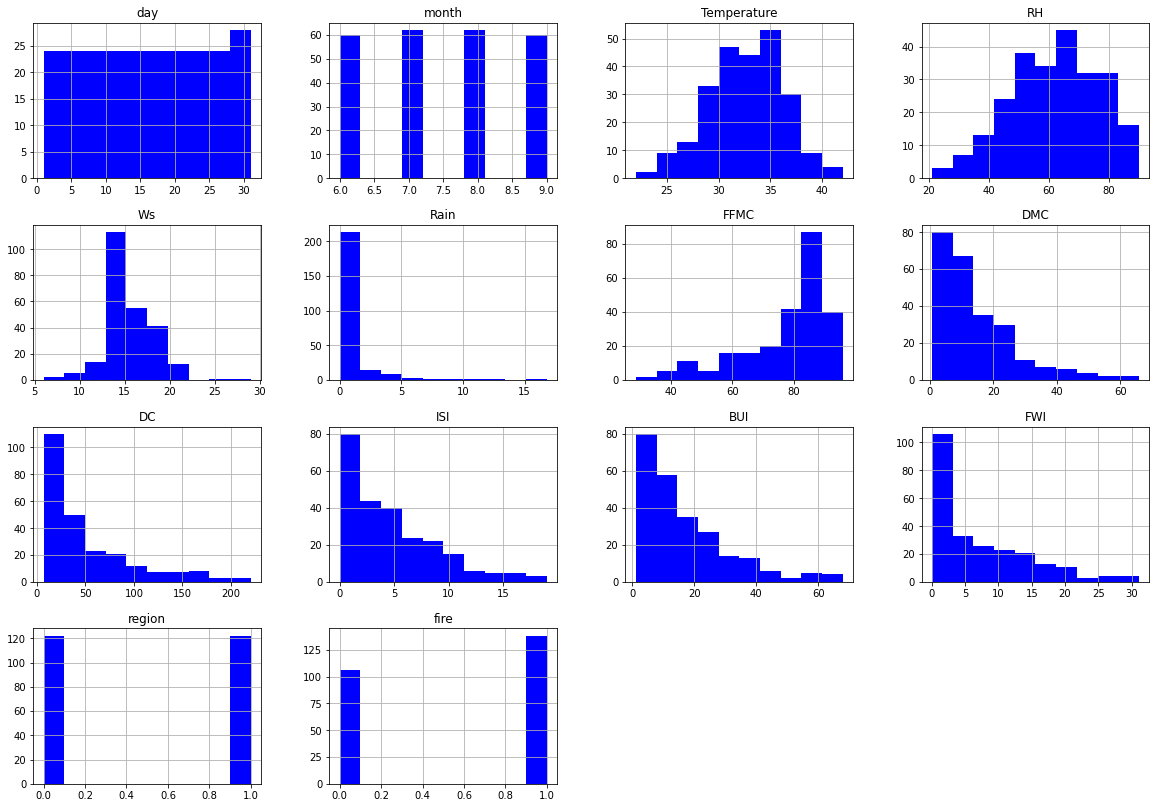

In [217]:
#Histograms
df.hist(figsize=(20,14),color='b')

Report:

<AxesSubplot:xlabel='Temperature', ylabel='day'>

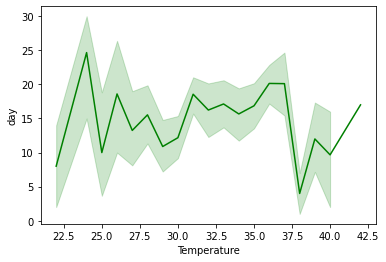

In [218]:
#Line Plot
sns.lineplot(x='Temperature',y='day', data=df,color='g')

Report:

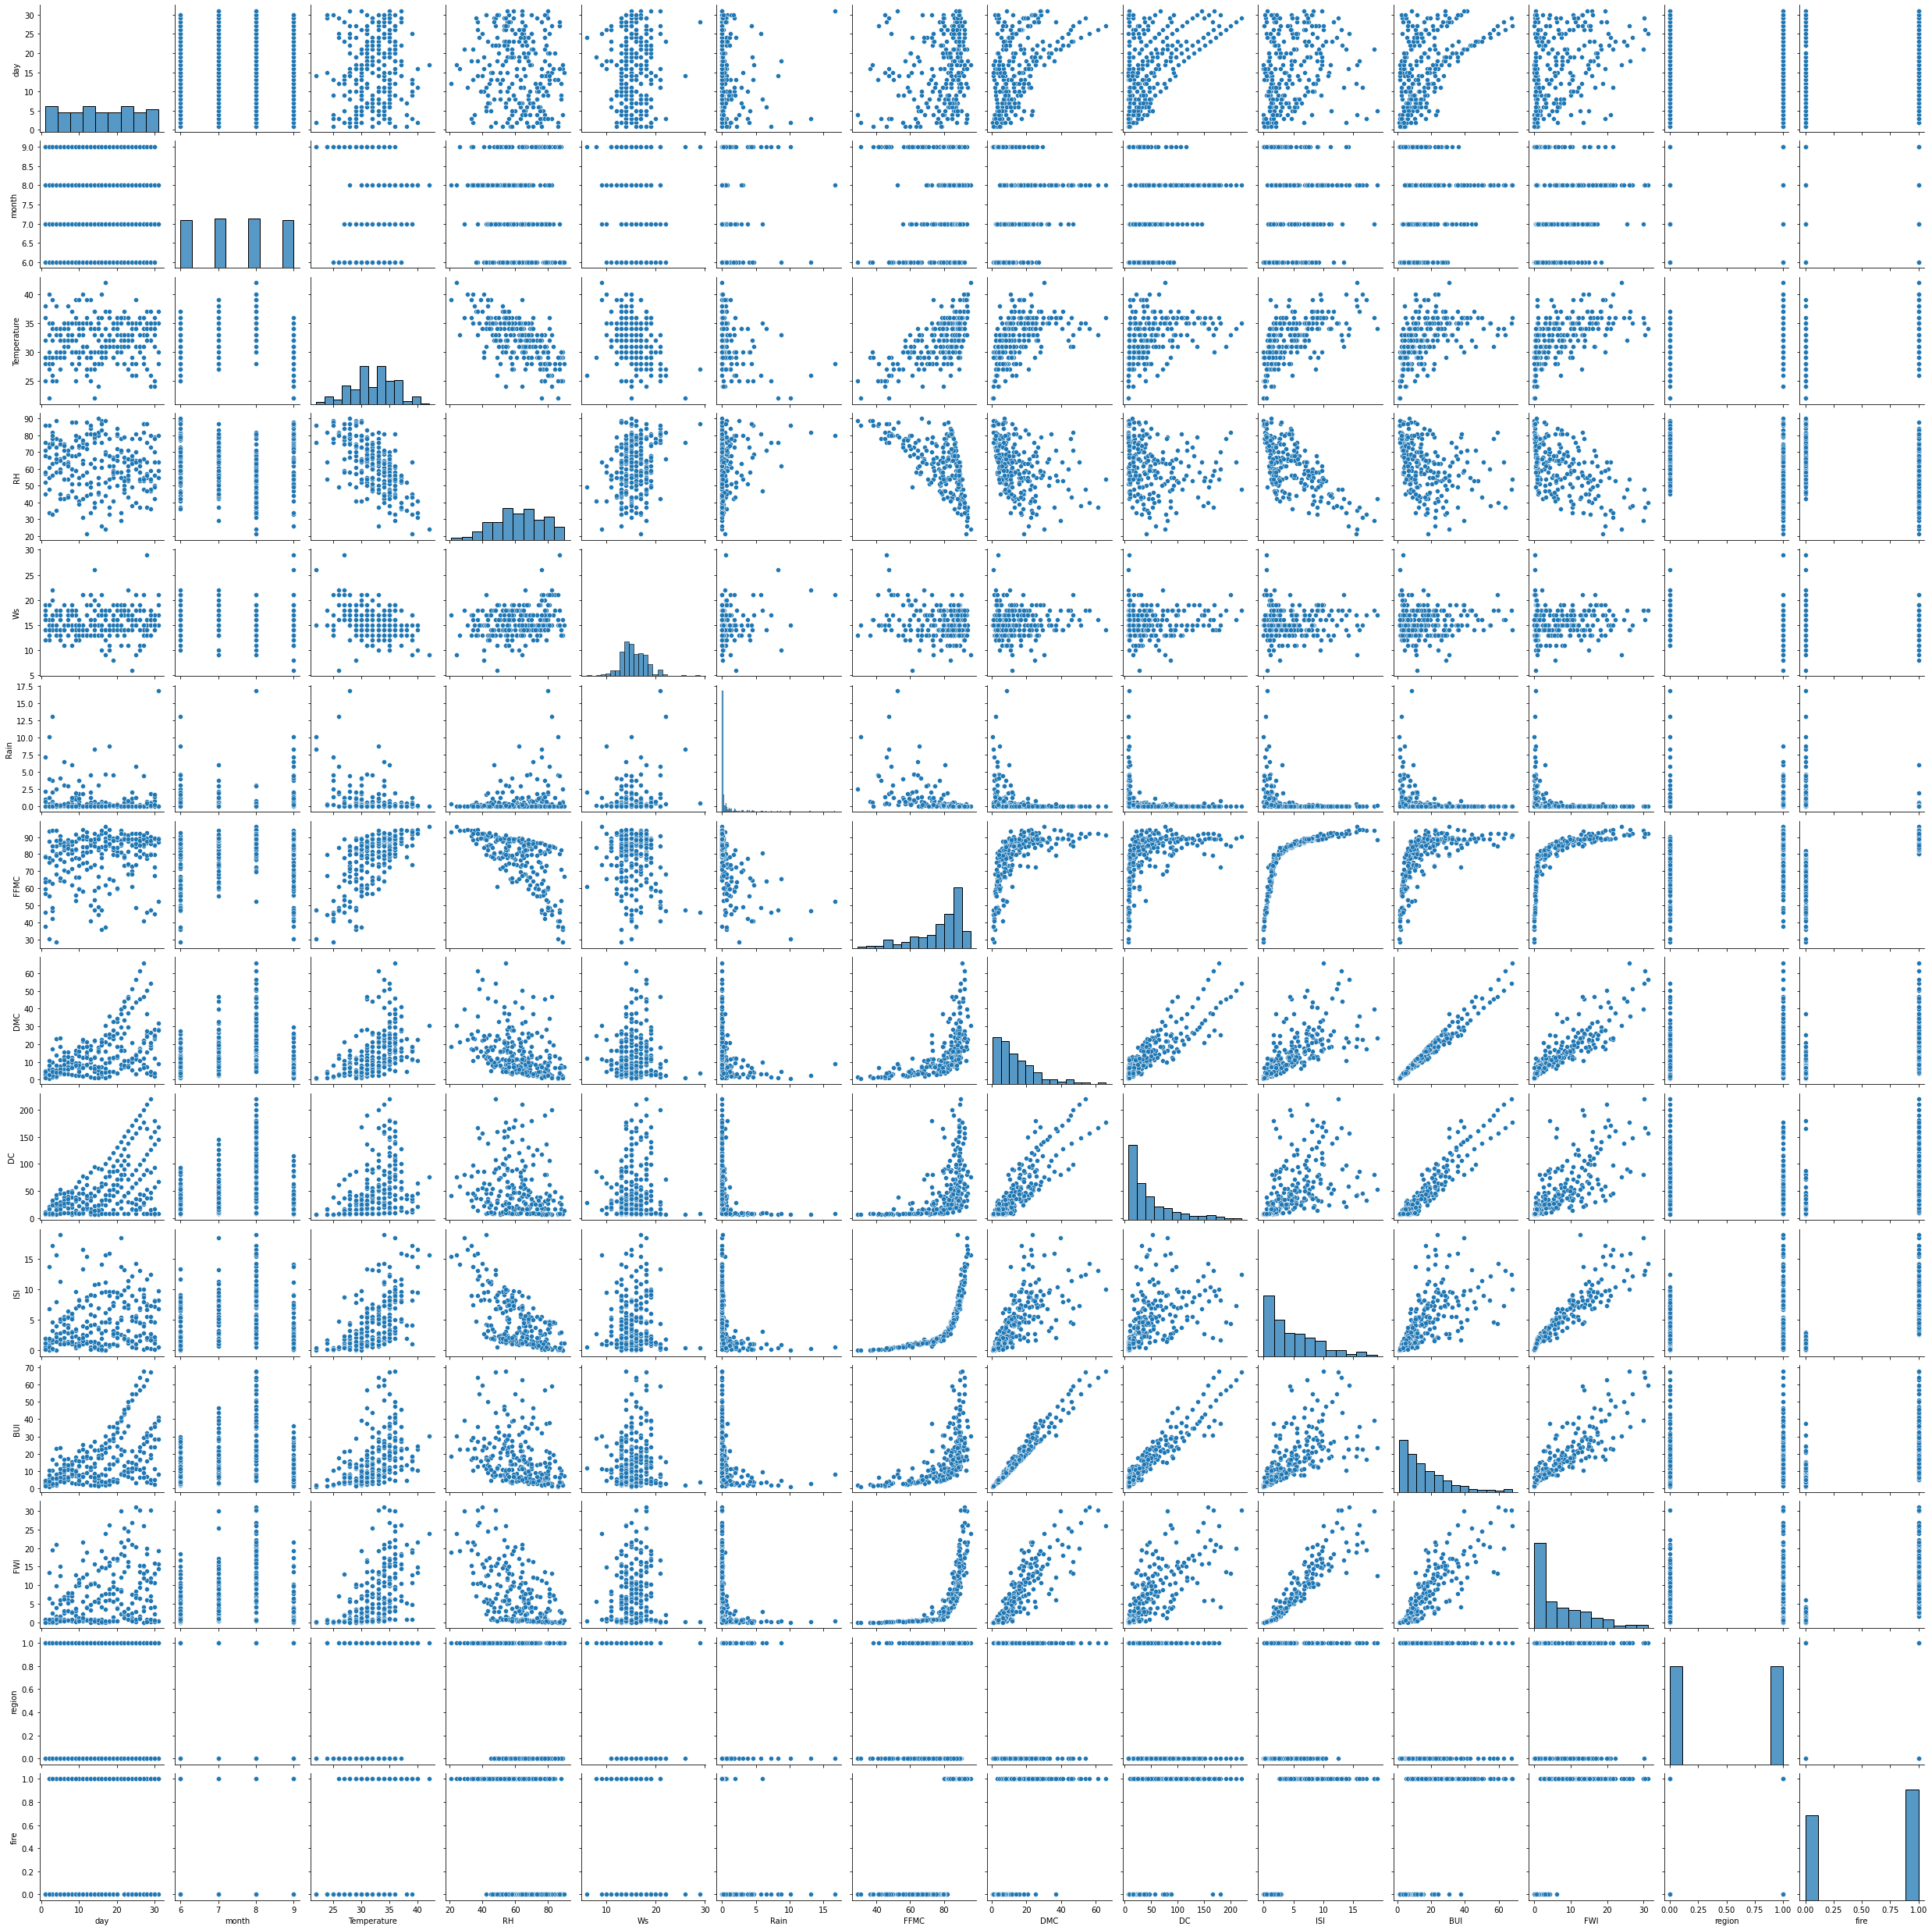

In [219]:
#Pairplot
sns.pairplot(df)

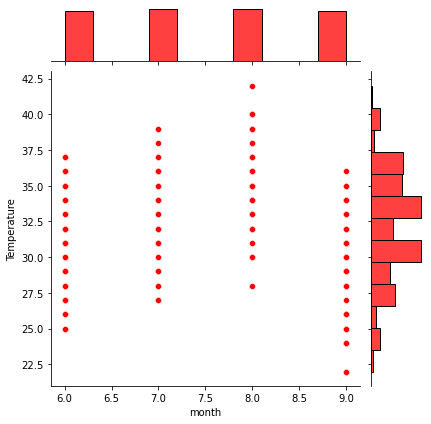

In [220]:
#Jointplot
sns.jointplot(x='month',y='Temperature',data=df,color='r')

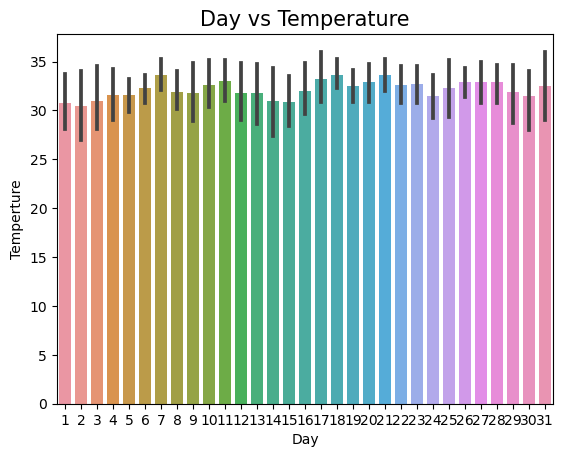

In [221]:
#Barplot
plt.style.use('default')
sns.barplot(x='day',y='Temperature',data=df)
plt.title('Day vs Temperature',fontsize=15)
plt.xlabel('Day')
plt.ylabel('Temperture')
plt.show()

### Basic analysis of data

In [222]:
#The highest temperature in the dataset
df.Temperature.max()

42

In [223]:
#The lowest temperature in the dataset
df.Temperature.min()

22

In [224]:
#When did it rain the most
highest_rain = df.sort_values(by='Rain',ascending=False)[['Rain','day','month']].head(1)
highest_rain

,Rain,day,month
91,16.8,31,8


Report: On August 31st it rain the most

In [225]:
#When did it rain the least
lowest_rain = df.sort_values(by='Rain',ascending=True)[['Rain','day','month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,1,6


Report: On June 1st it rain the lowest

In [226]:
#hotest month
hotest_month = df.sort_values(by='Temperature',ascending=False)[['month']].head(1)
hotest_month 

,month
199,8


Report: June is the hotest month

In [227]:
#collest month
coolest_month = df.sort_values(by='Temperature',ascending=True)[['month']].head(1)
coolest_month

,month
105,9


Report: September is the collest month

In [228]:
#The day which was coolest , id it rain or not , from which region it belongs
coolest_temperature = df.sort_values(by='Temperature',ascending=True)[['Temperature','day','month','Rain']].head(1)
coolest_temperature

,Temperature,day,month,Rain
105,22,14,9,8.3


Report: The day was coolest on 14th September, it rain on that day and there was no forest fire on that day.

### Checking if our predicted value 'Fire' is balanced or not

In [230]:
df['fire'].unique()

array([0, 1], dtype=int64)

In [231]:
df['fire'].value_counts()

1    138
0    106
Name: fire, dtype: int64

In [232]:
#Percentage calculation
df['fire'].value_counts()/len(df['fire'])*100

1    56.557377
0    43.442623
Name: fire, dtype: float64

### As from above observation we can conclude that our predictated feature is not imbalanced 

# Splitting Training and Testing data

In [233]:
## Independent And Dependent Features
X=df.loc[: , df.columns != 'fire']
y=df.iloc[:,-1]

In [234]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [250]:
X.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-8.148947e-02
ISI,1.793008e-01,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,2.662977e-01


In [251]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: fire, Length: 244, dtype: int64

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [238]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [239]:
scaler

StandardScaler()

In [240]:
X_train = scaler.fit_transform(X_train)

In [241]:
X_train

array([[ 1.0627621 ,  1.33562856, -1.77085211, ..., -0.32636097,
        -0.86597829,  0.98176139],
       [ 0.34495731,  0.44338489,  1.09557186, ...,  0.76499972,
         1.21371864, -1.01857744],
       [ 1.30203036, -1.34110244, -0.33764012, ...,  0.35224151,
         0.48516239, -1.01857744],
       ...,
       [-0.01394508,  1.33562856, -0.05099773, ...,  0.08639724,
         0.37919057,  0.98176139],
       [-1.32992053, -1.34110244, -0.62428252, ..., -0.76710278,
        -0.78649943,  0.98176139],
       [-0.61211574, -1.34110244, -1.19756732, ..., -0.27738965,
        -0.7997459 , -1.01857744]])

In [242]:
X_test=scaler.transform(X_test)

In [243]:
X_test

array([[-0.49248161, -0.44885878,  0.52228707, ..., -0.68315196,
        -0.81299238,  0.98176139],
       [ 1.90020102, -0.44885878,  0.80892946, ...,  1.72343828,
         1.16073273, -1.01857744],
       [-1.68882292,  0.44338489,  1.09557186, ..., -0.8300659 ,
        -0.7997459 , -1.01857744],
       ...,
       [ 0.94312797, -1.34110244,  0.23564467, ..., -0.69014786,
        -0.81299238,  0.98176139],
       [ 1.30203036,  0.44338489,  0.23564467, ...,  3.3185039 ,
         3.0947184 ,  0.98176139],
       [-0.13357921,  1.33562856, -2.9174217 , ..., -1.04693886,
        -0.90571772, -1.01857744]])

# Model Training

### Logistic  Regression

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
regression=LogisticRegression()

In [254]:
regression

LogisticRegression()

In [255]:
regression.fit(X_train,y_train)

LogisticRegression()

In [256]:
## print the coefficients and the intercept
print(regression.coef_)

[[-0.23249353  0.25370753  0.19141307  0.14861084  0.15768003 -0.18306069
   2.12253196 -0.01312533 -0.25073368  2.46959371  0.25751442  1.9479519
   0.25213316]]


In [257]:
print(regression.intercept_)

[1.06223645]


In [258]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [259]:
reg_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

### Assumptions of Logistic Regression

In [262]:
from sklearn.metrics import confusion_matrix

In [269]:
cm = confusion_matrix(y_test,reg_pred)
cm

array([[30,  0],
       [ 7, 44]], dtype=int64)

In [279]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]
print(tp,fp,fn,tn)

30 0 7 44


In [275]:
accuracy = (tp+tn)/(tp+fp+fn+tn)
accuracy

0.9135802469135802

### Model prediction is 91 % accurate

### This is as per the task requirement